## **ADC Verification **

In [1]:
%matplotlib inline
from ctypes import *
import numpy as np
from matplotlib import pyplot as plt
import drs4lib as drs
import time

#### **Read Data**

In [2]:
fname='data/p3_testrun1486/events.dat'

In [3]:
status,wd=drs.get_adc_events(fname,0,100)
if status!=0:
    print("ERROR !! ecode = ",status)
print(wd.nbytes/1024**2 ," MB occupied")

6.3125  MB occupied


#### **Plot All Event**

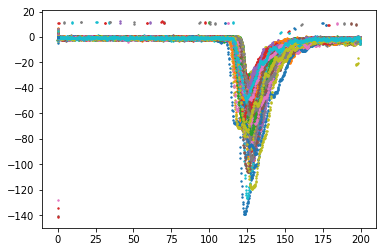

In [4]:
end=-1
start=0
chID=3
for eventID in range(len(wd)):
    dta=np.transpose(wd[eventID][chID])
    plt.scatter(dta[0][start:end],dta[1][start:end],s=2)


#### **ADC integration**

In [27]:
def ADC_integral(wf,tm,ch,trig,n_off,i_window,freq,f_edge):
    i=1
    t_sign=1
    if f_edge==False :
        t_sign=-1
    integ=0
    while(i<1024):
        if wf[ch][i]*t_sign < trig*t_sign:
            start=i
            break
        i+=1
    while(i>0):
        if tm[ch][start]-tm[ch][i] > n_off:
            start=i
            break
        i-=1
    window=0
    while i<1024 and window<i_window:
        dt=tm[ch][i]-tm[ch][i-1]
        window+=dt
        integ+=dt*wf[ch][i]
        i+=1
    return integ,start,i       

In [29]:
N=len(wd)*0+20

        ADC integration function here

In [30]:
channel=2
trigger_level=-40
neg_offset=10
integrate_window=50
frequency=5.12
falling_edge=True


waveform=np.zeros((8,1024))
tme=np.zeros((8,1024))

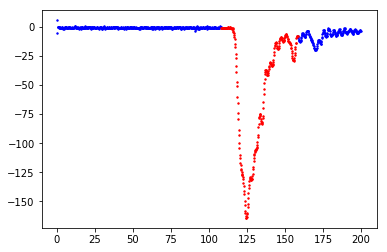

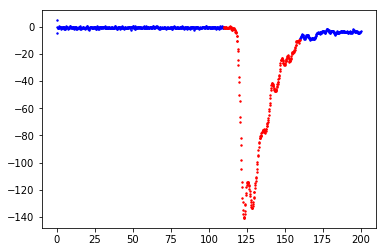

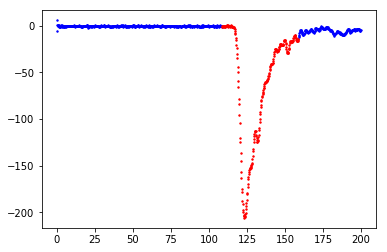

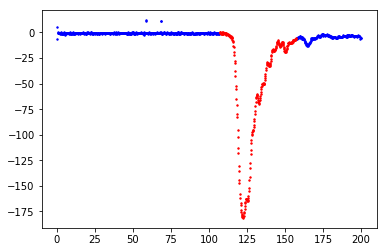

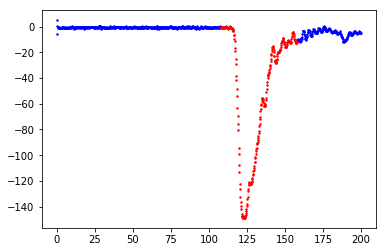

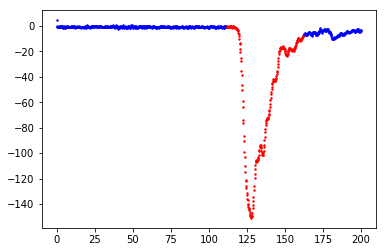

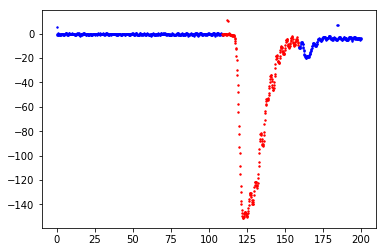

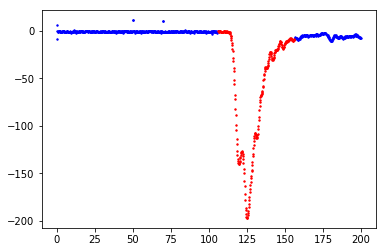

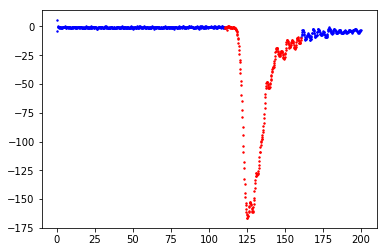

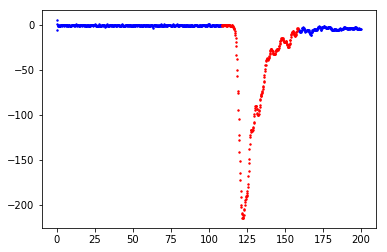

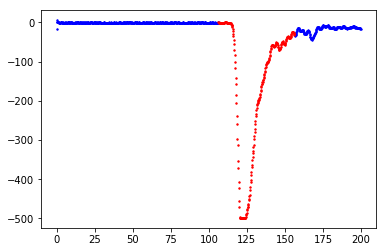

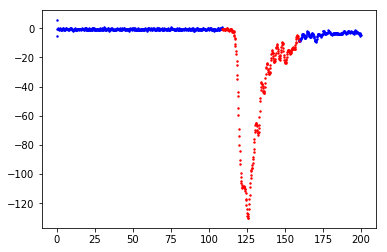

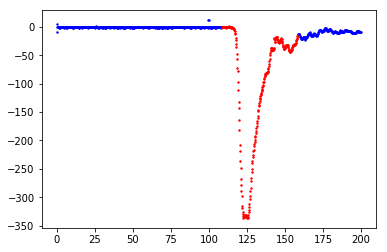

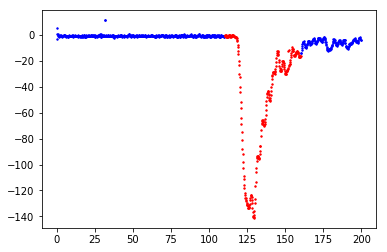

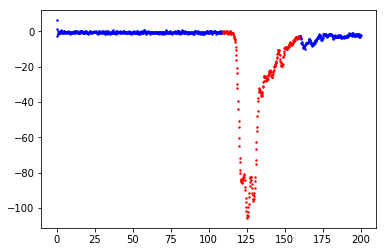

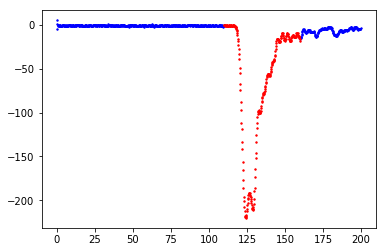

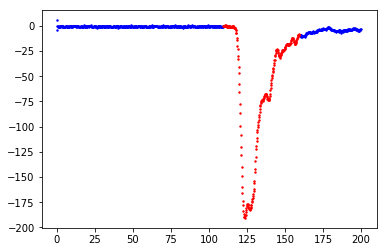

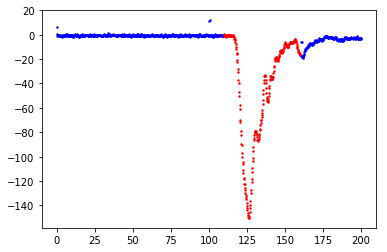

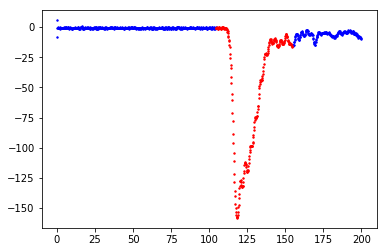

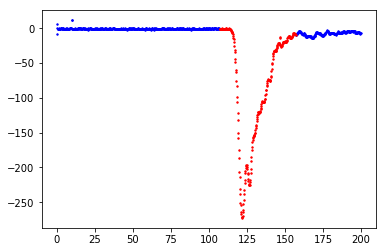

In [31]:
integral=[]
for eventID in range(N):
    plt.figure()
    dta=np.transpose(wd[eventID][channel])
    waveform[channel]=dta[1]
    tme[channel]=dta[0]
    inte,s,e=ADC_integral(waveform,tme,channel,trigger_level,neg_offset,integrate_window,frequency,falling_edge)
    integral.append(inte)
    plt.scatter(dta[0][0:s],dta[1][0:s],s=2,c='b')
    plt.scatter(dta[0][e:],dta[1][e:],s=2,c='b')
    plt.scatter(dta[0][s:e],dta[1][s:e],s=2,c='r')
# plt.xlim((-100,0))